In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (12,9)
pp = PdfPages('multipage.pdf')

In [2]:
df = pd.read_csv('esame.csv', index_col=None)
df.head()

,Temp,h,U,deltaU,Cv,deltaCv,Mag,deltaMag
0,1.1,0,-1216.13,0.064483,384.601,-26.63580,0.849608,-0.000141
1,1.2,0,-1168.40,0.101702,1453.620,-105.13400,0.800646,0.000094
2,1.3,0,-1095.30,0.193174,6345.590,-6.14279,0.702281,-0.000239
3,1.4,0,-1104.49,0.056173,418.815,-5.08746,0.726908,0.000048
4,1.5,0,-1041.89,0.094146,705.703,-9.53470,0.754898,-0.000276


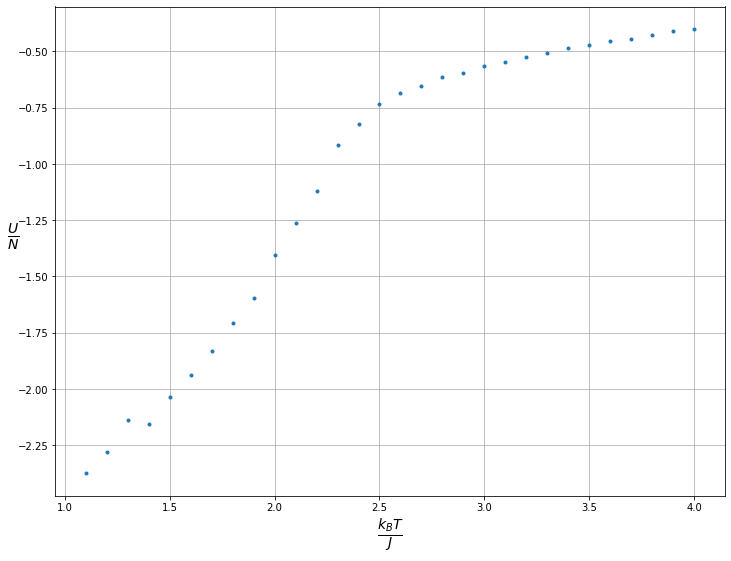

In [3]:
N = 512
dfh = df[df.h == 0].copy()
dfh['U'] = dfh.U/N
dfh['deltaU'] = dfh.deltaU/N
plt.errorbar(dfh.Temp[:-10], dfh.U[:-10], fmt='.', yerr=dfh.deltaU[:-10])
plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
plt.ylabel('$\\frac{U}{N}$', fontsize=20, rotation='horizontal')
plt.grid()
pp.savefig()
plt.show()

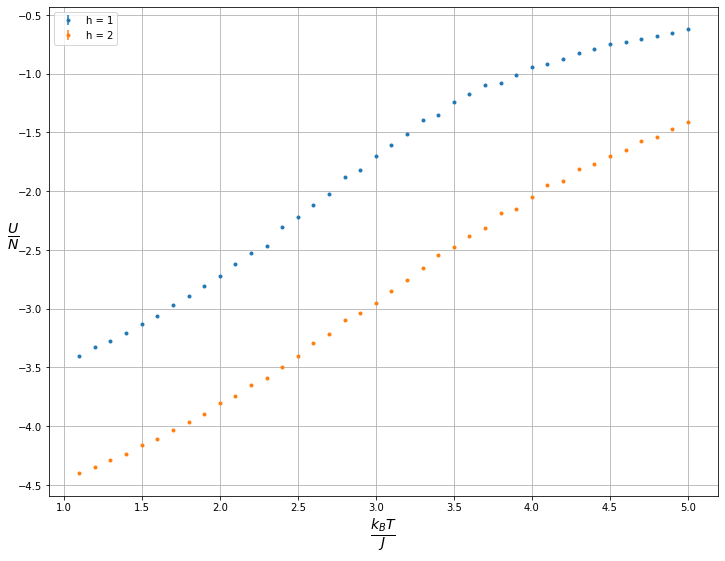

In [4]:
for h in set(df.h):
    if h==0: continue
    dfh = df[df.h == h]
    plt.errorbar(dfh.Temp, dfh.U/N, fmt='.', yerr=dfh.deltaU/N, label=f'h = {h}')
    plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
    plt.ylabel('$\\frac{U}{N}$', fontsize=20, rotation='horizontal')
    
plt.grid()
plt.legend()
pp.savefig()
plt.show()

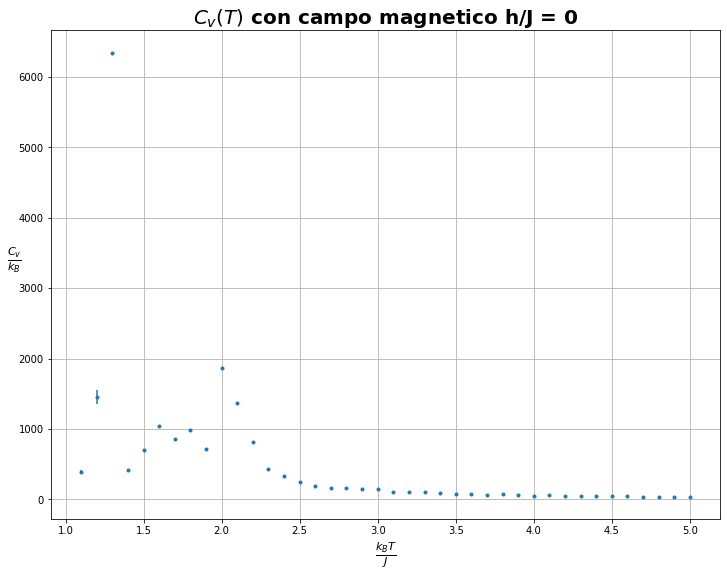

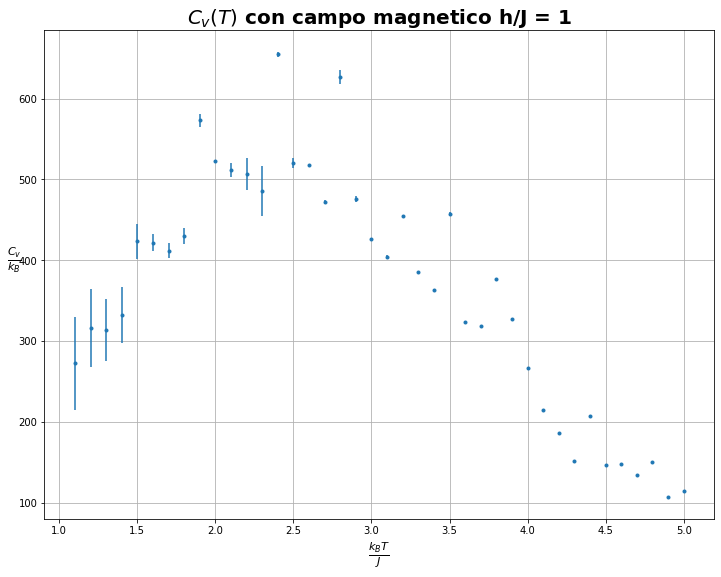

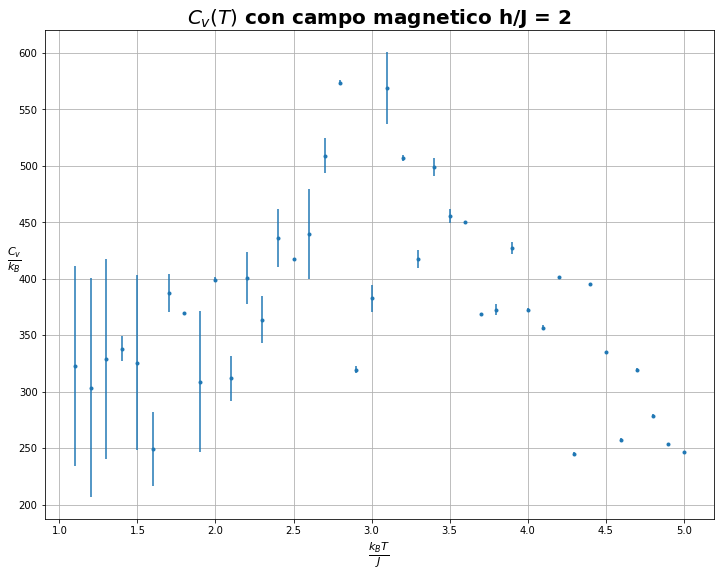

In [5]:
for h in set(df.h):
    dfh = df[df.h == h]
    plt.errorbar(dfh.Temp, dfh.Cv, fmt='.', yerr=dfh.deltaCv)
    plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=16)
    plt.ylabel('$\\frac{{C_v}}{{k_B}}$', fontsize=16, rotation='horizontal')
    plt.title(f'$C_v(T)$ con campo magnetico h/J = {h}', fontsize=20, weight='bold')
    plt.grid()
    plt.show()

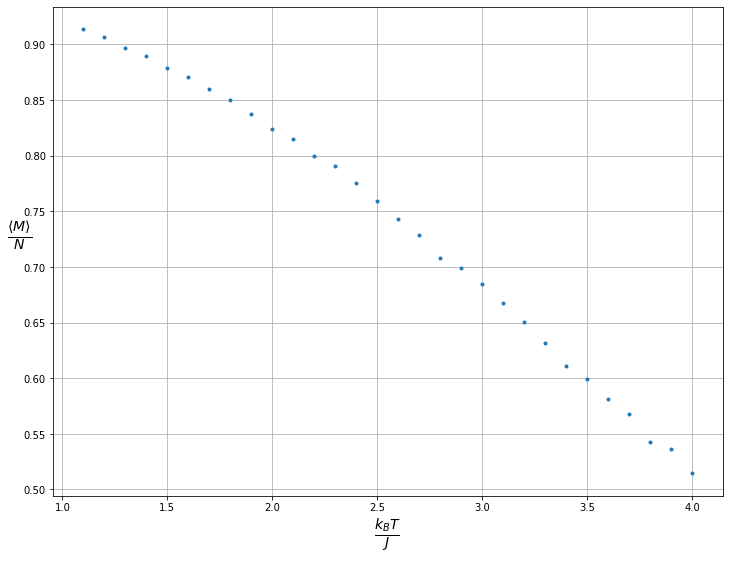

In [6]:
dfh = df[df.h == h]
plt.errorbar(dfh.Temp[:-10], dfh.Mag[:-10], fmt='.', yerr=dfh.deltaMag[:-10])
plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
plt.ylabel('$\\frac{{\\langle M\\rangle}}{N}}$', fontsize=20, rotation='horizontal')
plt.grid()
pp.savefig()
plt.show()

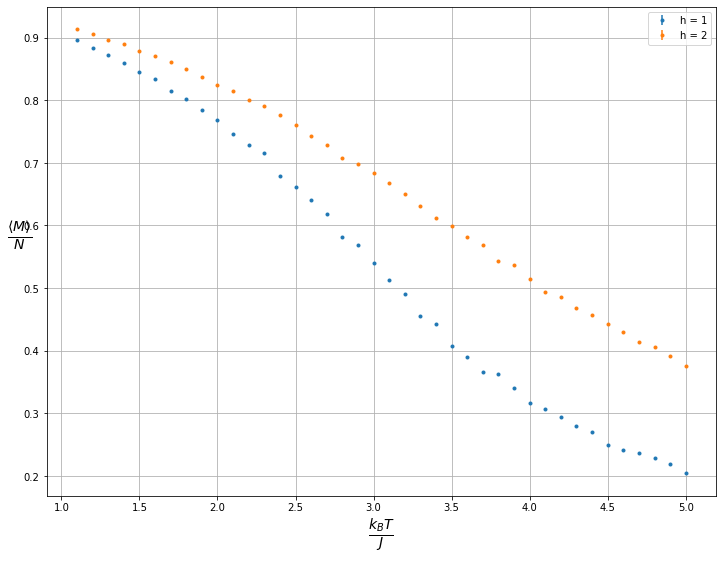

In [7]:
for h in set(df.h):
    if h==0: continue
    dfh = df[df.h == h]
    plt.errorbar(dfh.Temp, dfh.Mag, fmt='.', yerr=dfh.deltaMag, label=f'h = {h}')
    plt.xlabel('$\\frac{{k_B T}}{{J}}$', fontsize=20)
    plt.ylabel('$\\frac{{\\langle M\\rangle}}{N}}$', fontsize=20, rotation='horizontal')

plt.grid()    
plt.legend()
pp.savefig()
plt.show()

In [8]:
pp.close()